In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

stock = pd.read_csv("C:\\Users\\user\\2024_ai_test\\stock.csv")
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [2]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [4]:
stock_HIM = stock[stock['Code']=='A238490']
stock_HIM = stock_HIM [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_HIM

,Date,Open,High,Low,Close,Volume
1999,20210601,11700,11750,11400,11500,106454
3999,20210602,11500,11550,11350,11400,55933
5999,20210603,11450,11600,11350,11550,78144
7999,20210604,11550,11750,11450,11750,86093
9999,20210607,11750,11900,11550,11750,58979
...,...,...,...,...,...,...
979999,20230523,6710,6710,6420,6430,40981
981999,20230524,6400,6490,6210,6320,19392
983999,20230525,6340,6400,6270,6330,6457
985999,20230526,6330,6410,6300,6330,8905


In [5]:
stock_HIM['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [6]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [7]:
dfx = stock_HIM[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
1999,0.960191,0.888060,0.936102,0.040126
3999,0.928344,0.858209,0.928115,0.020771
5999,0.920382,0.865672,0.928115,0.029280
7999,0.936306,0.888060,0.944089,0.032326
9999,0.968153,0.910448,0.960064,0.021938
...,...,...,...,...
979999,0.165605,0.135821,0.140575,0.015042
981999,0.116242,0.102985,0.107029,0.006771
983999,0.106688,0.089552,0.116613,0.001815
985999,0.105096,0.091045,0.121406,0.002753


In [8]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.397367,0.375929,0.398006,0.018949
std,0.286471,0.267859,0.284132,0.062491
min,0.000000,0.000000,0.000000,0.000000
25%,0.117834,0.109328,0.121406,0.003728
50%,0.365446,0.342537,0.373003,0.008189
75%,0.617436,0.578731,0.615815,0.015195
max,1.000000,1.000000,1.000000,1.000000


In [9]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [10]:
window_size = 5

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.16719745222663698, 0.15671641790810872, 0.17412140574801724, 0.005015853652929707], [0.16560509553876426, 0.1358208955203609, 0.14057507986995887, 0.015042197228943335], [0.11624203821470952, 0.10298507462532858, 0.1070287539919005, 0.006770942683182608], [0.10668789808747313, 0.08955223880463355, 0.11661341852848861, 0.001815239429237775], [0.1050955413996004, 0.09104477611804411, 0.12140575079678266, 0.002753125905129306]] -> [0.4003215434019241]


In [11]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 489 489


In [12]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (342, 5, 4) (342, 1)
테스트 데이터의 크기 : (147, 5, 4) (147, 1)


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(RNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

# 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


TypeError: RNN.__init__() missing 1 required positional argument: 'cell'

In [14]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3433
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2799 
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2267 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1411 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0684 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch

In [16]:
model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015      


0.0022592812310904264

In [17]:
y_pred = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [18]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.001970190041655261


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


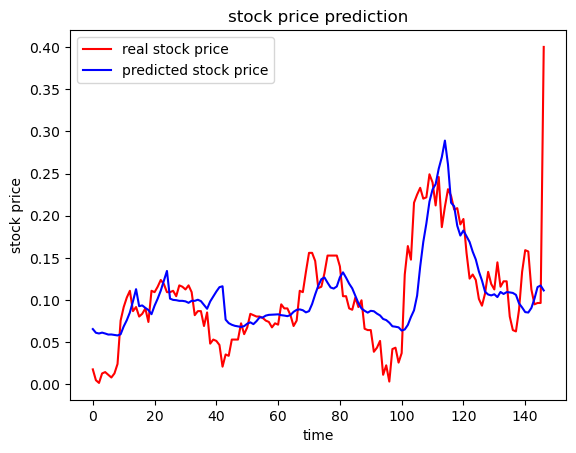

In [19]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()